In [ ]:
## Análise de variaveis para verificação de séries temporais

In [7]:
#importando o dataset
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/SHIFT/Data/pib.csv')

## Uma série temporal :
## 1. São dados ao longo do tempo, em algum unidade de tempo definida;
## 2. Temos 1 valor para cada unidade de tempo (não permite nulos ou valores duplicados)
## 3. São dados agregados
## 4. Tem 3 componentes: Tendência, Sazonalidade e Ruído

In [50]:
## Verificando se os dados possuem uma unidade de tempo definida

def checktime(df):

    df['ANO_MES'] = pd.to_datetime(df['ANO_MES'], format='%Y-%m', errors='coerce')

    return not df['ANO_MES'].isna().all()

if checktime(df):
    print('Os dados possuem uma unidade de tempo definida.')
else:
    print('Os dados não possuem uma unidade de tempo definida.')

Os dados não possuem uma unidade de tempo definida.


In [28]:
## verificando se os valores são não nulos e unicos

serie_temporal = df['ANO_MES']
notnull = serie_temporal.notnull()
notduplicated = ~serie_temporal.duplicated()

if notnull.all():
    print('Todos os valores são não nulos')
else:
    print('Há valores nulos na série')

if notduplicated.all():
    print('Todos os valores são únicos')
else:
    print('Há valores duplicados na série')

Todos os valores são não nulos
Todos os valores são únicos


In [55]:
## Verificando se os dados são agregados

PIB = df['PIB']
duplicados = PIB.duplicated().sum()
if duplicados == 0:
    print('Os dados são agregados')
else:
    print('Os dados não são agregados')

Os dados não são agregados


<ipython-input-59-488c353a03fb>:45: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'ANO_MES': pd.date_range(start='2020-01-01', periods=36, freq='M'),


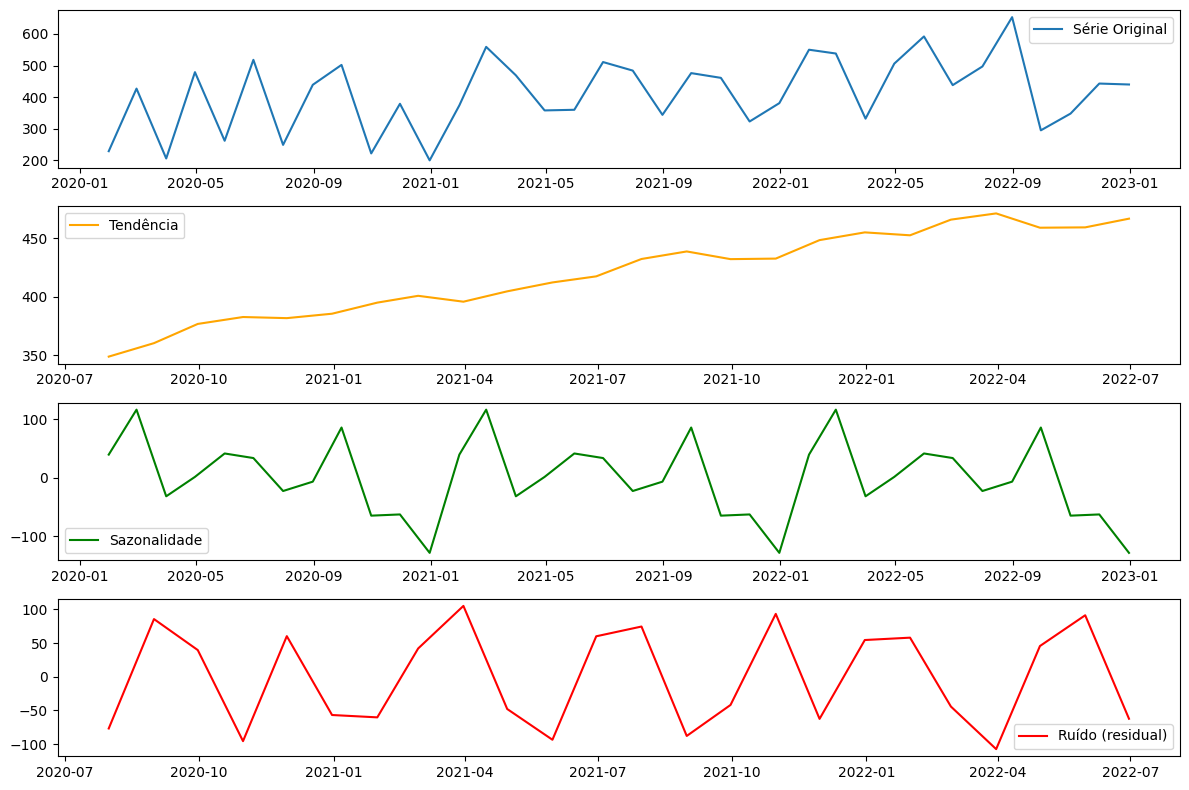

In [59]:
## verificando se os dados possuem têndencia, sazonalidade e ruído

import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def analisar_serie_temporal(df, coluna_tempo, coluna_valor, frequencia):

    if coluna_tempo not in df.columns or coluna_valor not in df.columns:
        print("Erro: As colunas especificadas não existem no DataFrame.")
        return

    df[coluna_tempo] = pd.to_datetime(df[coluna_tempo])
    df = df.set_index(coluna_tempo)

    df = df.sort_index()

    decomposicao = seasonal_decompose(df[coluna_valor], model='additive', period=12)


    plt.figure(figsize=(12, 8))

    plt.subplot(411)
    plt.plot(df[coluna_valor], label='Série Original')
    plt.legend(loc='best')

    plt.subplot(412)
    plt.plot(decomposicao.trend, label='Tendência', color='orange')
    plt.legend(loc='best')

    plt.subplot(413)
    plt.plot(decomposicao.seasonal, label='Sazonalidade', color='green')
    plt.legend(loc='best')

    plt.subplot(414)
    plt.plot(decomposicao.resid, label='Ruído (residual)', color='red')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

    return decomposicao

dados = {
    'ANO_MES': pd.date_range(start='2020-01-01', periods=36, freq='M'),
    'VENDAS': np.random.randint(100, 500, 36) + np.arange(36) * 5
}
df = pd.DataFrame(dados)

resultado = analisar_serie_temporal(df, 'ANO_MES', 'VENDAS', frequencia=12)
